# Agenda
- Analyze the [General Credit Card](https://www.kaggle.com/arjunbhasin2013/ccdata) dataset and answer the following possible questions that may arise.

	#### I. Clusters analysis.
	_(*After doing appropriate data cleaning steps)_

	1. Use KMeans to segment the bank customers into groups. You should be able to perform the following tasks:
		1. Compute the Within-Cluster-Sum-Squares for multiple values of k.
		2. Plot the WCSS curve and choose an optimal value k.
		3. Perform clustering with the chosen k.
	2. (Optional) Use DBSCAN to perform clustering on the same dataset. State the hyperparameters used (epsilon and minimum samples per cluster).

	#### II. Extract insights.
	_From the cluster labels derived by either DBSCAN or KMEANS, extract the insights from the clusters. For example:_
	1. Is there any significant difference in the distribution of purchases among the clusters.
	2. Is there any significant difference in the distribution of purcahses frequency among the clusters.
	3. ... (Extract as many insights as possible).

# Dataset description
- This dataset consists of one file : 
	- 1. **CC GENERAL.csv** : Dataset file.
- Please refer to the kaggle link above for column descriptions.

<br/>

# Recommended readings
- DBSCAN explained - *Pay attention to the meaning of epsilon and minimum number of samples per cluster parameters* : [Link](https://www.youtube.com/watch?v=_A9Tq6mGtLI)
- A short description of the differences between KMeans and DBSCAN : [Link](https://soroushhashemifar.medium.com/kmeans-vs-dbscan-d9d5f9dbee8b)
- Example of using DBSCAN in sklearn : [Link](https://github.com/reshma78611/DBSCAN-Clustering-using-Python/blob/main/dbscan_clust.py)

# Import libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

In [9]:
data = pd.read_csv('CC GENERAL.csv')
data['CREDIT_LIMIT'] = SimpleImputer(strategy='median').fit_transform(data[['CREDIT_LIMIT']])
data['MINIMUM_PAYMENTS'] = SimpleImputer(strategy='median').fit_transform(data[['MINIMUM_PAYMENTS']])


data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
# Get all columns except the 
columns = list(data.columns)
columns.remove("CUST_ID")

features = data[columns]
features = StandardScaler().fit_transform(features)

# Perform PCA on ALL features
pc = PCA(n_components=3).fit_transform(features)
data['pc_1'] = pc[:, 0]
data['pc_2'] = pc[:, 1]
data['pc_3'] = pc[:, 2]
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pc_1,pc_2,pc_3
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,-1.683648,-1.072241,0.475557
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.134084,2.509152,0.601866
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,0.969397,-0.383573,0.090520
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.888220,0.004650,1.499573
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,-1.600020,-0.683795,0.347882


In [14]:
# KMeans on the principal components
kmeans = KMeans(n_clusters=5).fit(data[['pc_1', 'pc_2', 'pc_3']])
data['cluster_id'] = kmeans.predict(data[['pc_1', 'pc_2', 'pc_3']])
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pc_1,pc_2,pc_3,cluster_id
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,-1.683648,-1.072241,0.475557,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.134084,2.509152,0.601866,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,0.969397,-0.383573,0.090520,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,-0.888220,0.004650,1.499573,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,-1.600020,-0.683795,0.347882,0


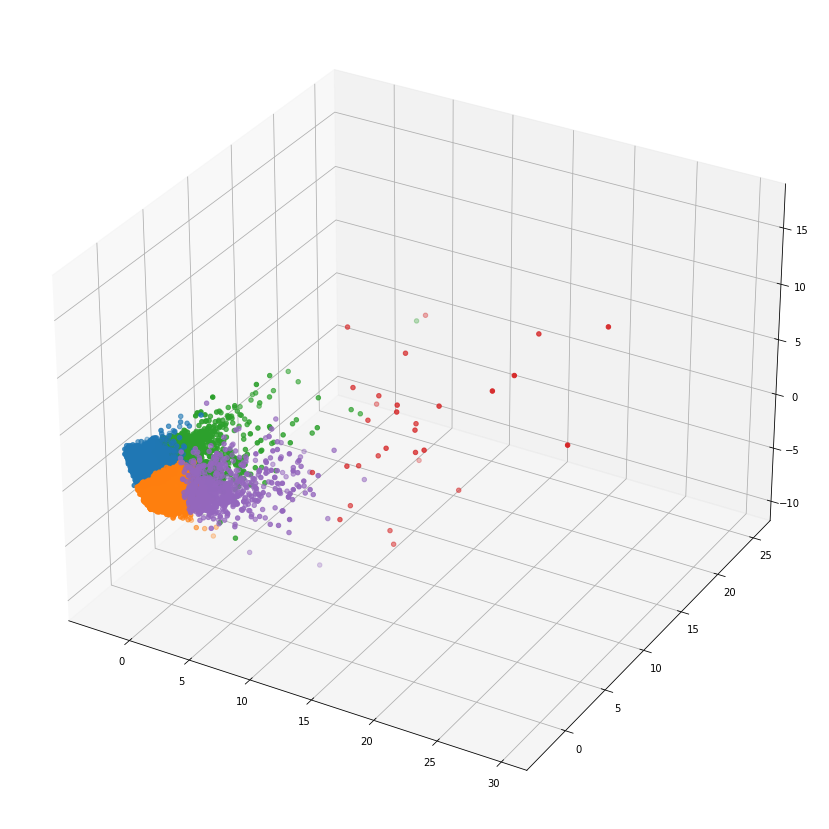

In [15]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in np.unique(data['cluster_id']):
    cluster = data[data['cluster_id'] == cluster_id]
    ax.scatter3D(cluster['pc_1'], cluster['pc_2'], cluster['pc_3'])
    
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

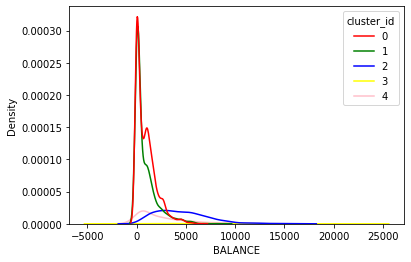

In [18]:
sns.kdeplot(data=data, x='BALANCE', hue='cluster_id',
           palette=['red', 'green', 'blue', 'yellow', 'pink'])